In [2]:
import tensorflow as tf

2024-10-02 14:01:49.398150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 14:01:49.566018: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 14:01:49.612421: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 14:01:49.020266: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 14:01:51.737586: W tensorflow/compiler/tf2

In [21]:
new_model = tf.keras.models.load_model('./model_others/output/hau.h5')

In [12]:
class_labels = ['ripe', 'rotten', 'unripe']

In [17]:
import numpy as np
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

def load_image_from_url(url, target_size=(150, 150)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_size)  # Resize image to the target size expected by the model
    img = np.array(img)  # Convert to numpy array
    if img.shape[-1] == 4:  # Handle images with alpha channel (RGBA)
        img = img[..., :3]
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

def display_and_predict(model, class_labels, image_url, target_size=(150, 150)):
    # Load and preprocess the image
    image = load_image_from_url(image_url, target_size)

    # Make the prediction
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction, axis=1)[0]

    # Display the image with the predicted label
    plt.imshow(image)
    plt.title(f"Prediction: {class_labels[predicted_label]}")
    plt.axis("off")  # Hide the axis
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


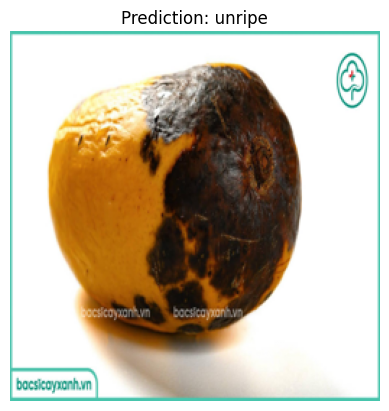

In [24]:
image = ""
display_and_predict(new_model, class_labels, image, target_size=(256, 256))